In [ ]:
def kel_to_grad(a):
    return (a - 273.15)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm

la = 54.25
lo = 48.29
years_data = pd.DataFrame()
for i in range(2017,2023):
    ds = xr.open_dataset(f'data/grib/{i}.grib', engine='cfgrib');
    data = ds.sel(latitude=la)
    data = data.sel(longitude=lo)
    df = data.to_dataframe()
    years_data = pd.concat([years_data,df])


skipping variable: paramId==260015 shortName='ptype'
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\WindDataPreporation2\lib\site-packages\cfgrib\dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\admin\anaconda3\envs\WindDataPreporation2\lib\site-packages\cfgrib\dataset.py", line 609, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1483228800, 1483232400, 1483236000, ..., 1514754000, 1514757600,
       1514761200])) new_value=Variable(dimensions=('time',), data=array([1483207200, 1483250400, 1483293600, 1483336800, 1483380000,
       1483423200, 1483466400, 1483509600, 1483552800, 1483596000,
       1483639200, 1483682400, 1483725600, 1483768800, 1483812000,
       1483855200, 1483898400, 1483941600, 1483984800, 1484028000,
       1484071200, 14

DatasetBuildError: multiple values for key 'edition'

In [2]:
years_data

number   step  surface  latitude  longitude  \
time                                                               
2019-01-01 00:00:00       0 0 days      0.0     54.25      48.29   
2019-01-01 01:00:00       0 0 days      0.0     54.25      48.29   
2019-01-01 02:00:00       0 0 days      0.0     54.25      48.29   
2019-01-01 03:00:00       0 0 days      0.0     54.25      48.29   
2019-01-01 04:00:00       0 0 days      0.0     54.25      48.29   
...                     ...    ...      ...       ...        ...   
2022-12-31 19:00:00       0 0 days      0.0     54.25      48.29   
2022-12-31 20:00:00       0 0 days      0.0     54.25      48.29   
2022-12-31 21:00:00       0 0 days      0.0     54.25      48.29   
2022-12-31 22:00:00       0 0 days      0.0     54.25      48.29   
2022-12-31 23:00:00       0 0 days      0.0     54.25      48.29   

                             valid_time       u10       v10         t2m  \
time                                                                      
2019-01-01 00:00:00 2019-01-01 00:00:00  2.473646  1.697850  259.317139   
2019-01-01 01:00:00 2019-01-01 01:00:00  2.322573  1.866665  258.828583   
2019-01-01 02:00:00 2019-01-01 02:00:00  2.109787  1.966070  258.115875   
2019-01-01 03:00:00 2019-01-01 03:00:00  1.870600  2.078490  257.322723   
2019-01-01 04:00:00 2019-01-01 04:00:00  1.722293  2.039435  256.553467   
...                                 ...       ...       ...         ...   
2022-12-31 19:00:00 2022-12-31 19:00:00 -0.984134  0.855892  271.606384   
2022-12-31 20:00:00 2022-12-31 20:00:00 -1.033106  0.566562  271.510925   
2022-12-31 21:00:00 2022-12-31 21:00:00 -0.638301  0.221360  271.347717   
2022-12-31 22:00:00 2022-12-31 22:00:00 -0.922180  0.227376  270.761353   
2022-12-31 23:00:00 2022-12-31 23:00:00 -0.471218  0.079791  270.939148   

                              sp       tcc  tcrw        tcw       tcwv  
time                                                                    
2019-01-01 00:00:00  101414.7500  0.889981   0.0   5.393880   5.370000  
2019-01-01 01:00:00  101371.3125  0.877261   0.0   5.400369   5.385942  
2019-01-01 02:00:00  101350.0000  0.885164   0.0   5.428884   5.421392  
2019-01-01 03:00:00  101321.3125  0.938527   0.0   5.484197   5.476645  
2019-01-01 04:00:00  101370.8125  0.935930   0.0   5.561955   5.555783  
...                          ...       ...   ...        ...        ...  
2022-12-31 19:00:00   99935.0000  1.000000   0.0  11.632673  11.440185  
2022-12-31 20:00:00   99947.6875  0.974585   0.0  11.462976  11.396815  
2022-12-31 21:00:00   99953.9375  0.919725   0.0  11.377716  11.360909  
2022-12-31 22:00:00   99961.8125  0.954957   0.0  11.277524  11.247285  
2022-12-31 23:00:00  100031.6875  0.999999   0.0  11.154714  11.096749  

[35064 rows x 14 columns]

In [39]:
#years_data = years_data.drop(['number','step','surface','latitude','longitude','valid_time'],axis=1)
#years_data.t2m = years_data.t2m.apply(kel_to_grad)
#years_data['ws'] = np.sqrt(np.square(years_data.u10)+np.square(years_data.v10))
#years_data['wd'] = np.arctan2(years_data.v10,years_data.u10)
years_data.columns = ['uwind','vwind','temperature','spressure','totalcloudcover','totalcolumnrainwater','totalcolumnwater','totalcolumnwatervapor','windspeed','winddirection']

In [40]:
years_data.head()

uwind     vwind  temperature    spressure  \
time                                                                
2019-01-01 00:00:00  2.473646  1.697850   -13.832861  101414.7500   
2019-01-01 01:00:00  2.322573  1.866665   -14.321417  101371.3125   
2019-01-01 02:00:00  2.109787  1.966070   -15.034125  101350.0000   
2019-01-01 03:00:00  1.870600  2.078490   -15.827277  101321.3125   
2019-01-01 04:00:00  1.722293  2.039435   -16.596533  101370.8125   

                     totalcloudcover  totalcolumnrainwater  totalcolumnwater  \
time                                                                           
2019-01-01 00:00:00         0.889981                   0.0          5.393880   
2019-01-01 01:00:00         0.877261                   0.0          5.400369   
2019-01-01 02:00:00         0.885164                   0.0          5.428884   
2019-01-01 03:00:00         0.938527                   0.0          5.484197   
2019-01-01 04:00:00         0.935930                   0.0          5.561955   

                     totalcolumnwatervapor  windspeed  winddirection  
time                                                                  
2019-01-01 00:00:00               5.370000   3.000270       0.601523  
2019-01-01 01:00:00               5.385942   2.979729       0.676996  
2019-01-01 02:00:00               5.421392   2.883857       0.750152  
2019-01-01 03:00:00               5.476645   2.796295       0.837992  
2019-01-01 04:00:00               5.555783   2.669380       0.869507

In [41]:
years_data.to_csv('data/scv/data_from_grib.csv')

In [30]:
plt.rcParams['figure.figsize'] = [20, 8]
years = ['2019','2020','2021','2022']

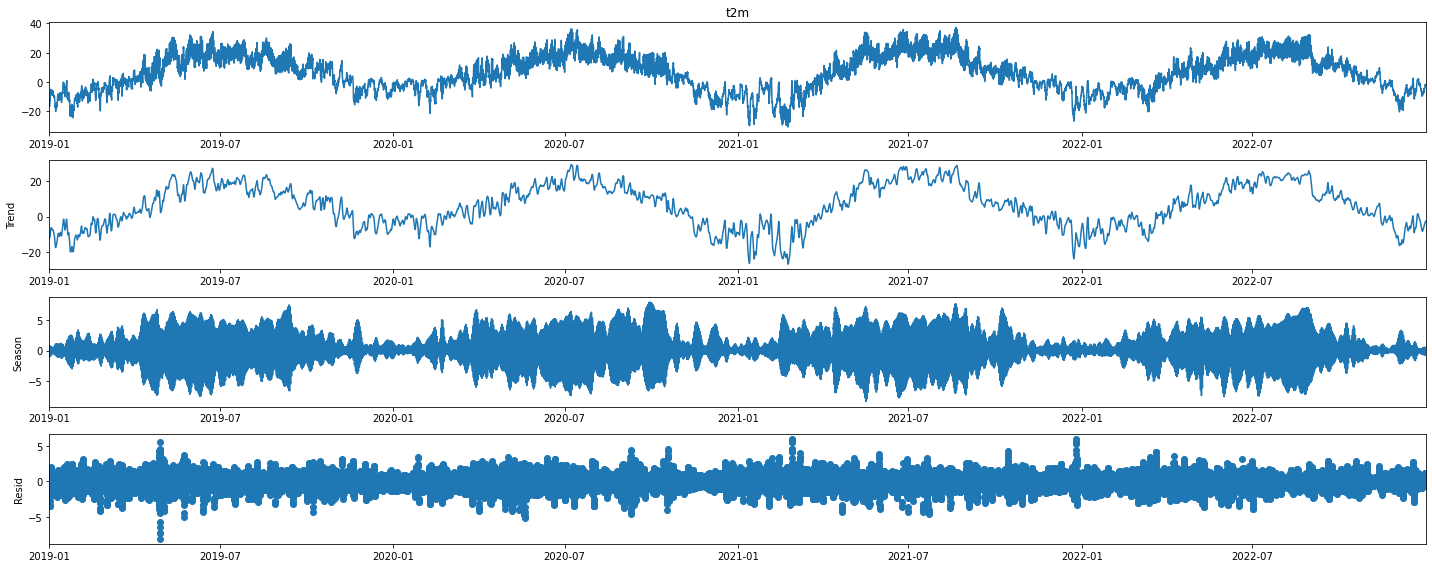

In [36]:
from statsmodels.tsa.seasonal import STL

stl = STL(years_data.t2m)
res = stl.fit()
fig = res.plot()

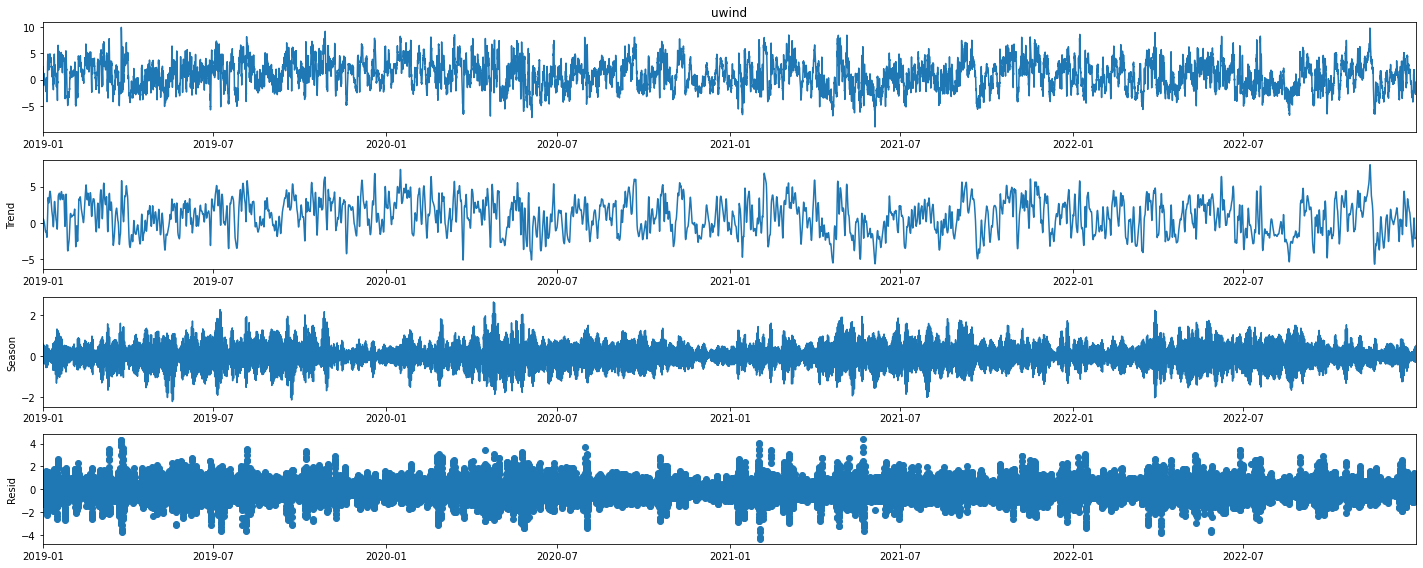

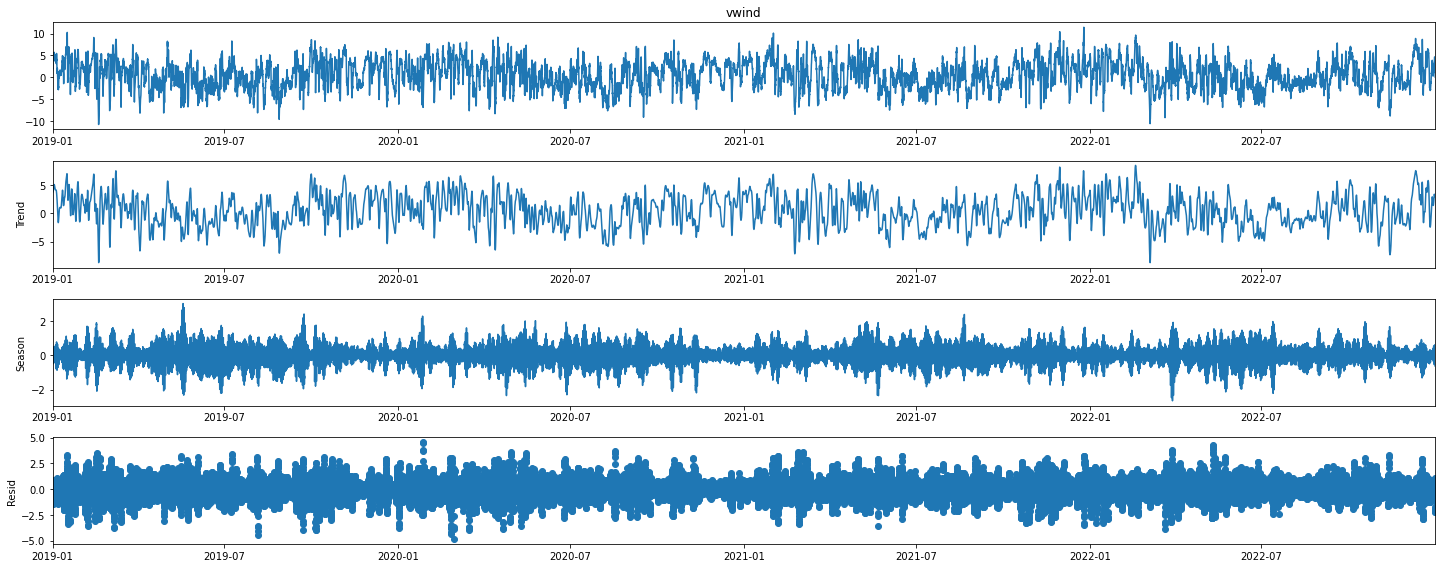

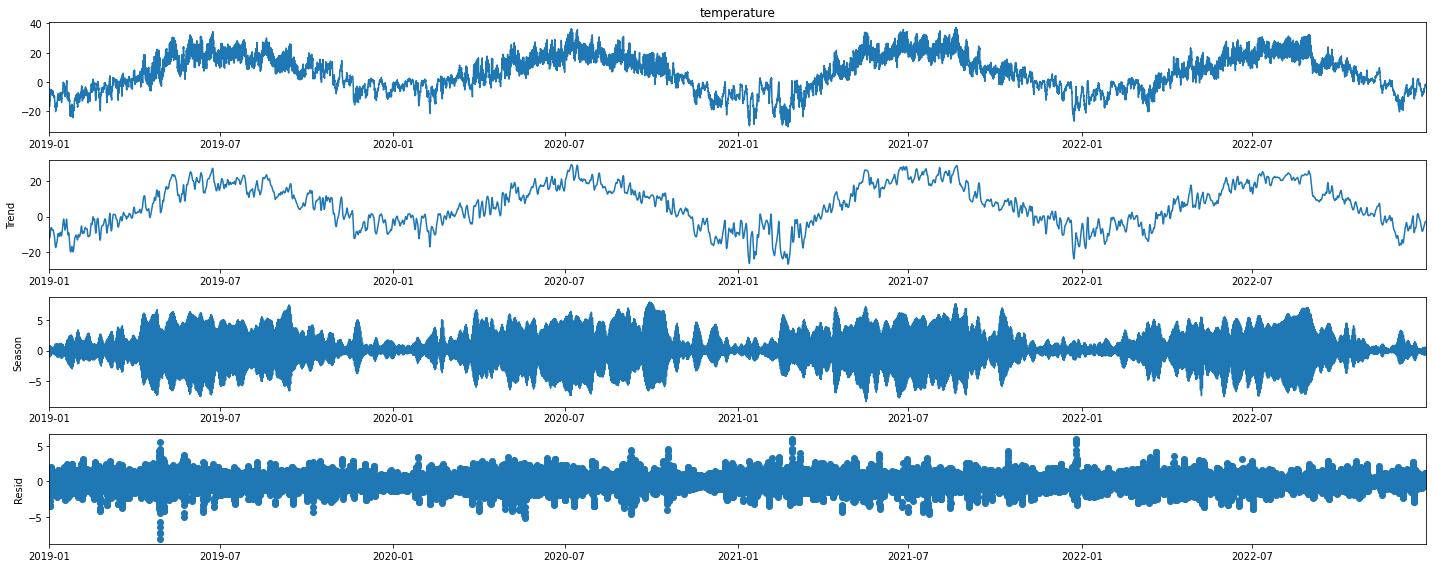

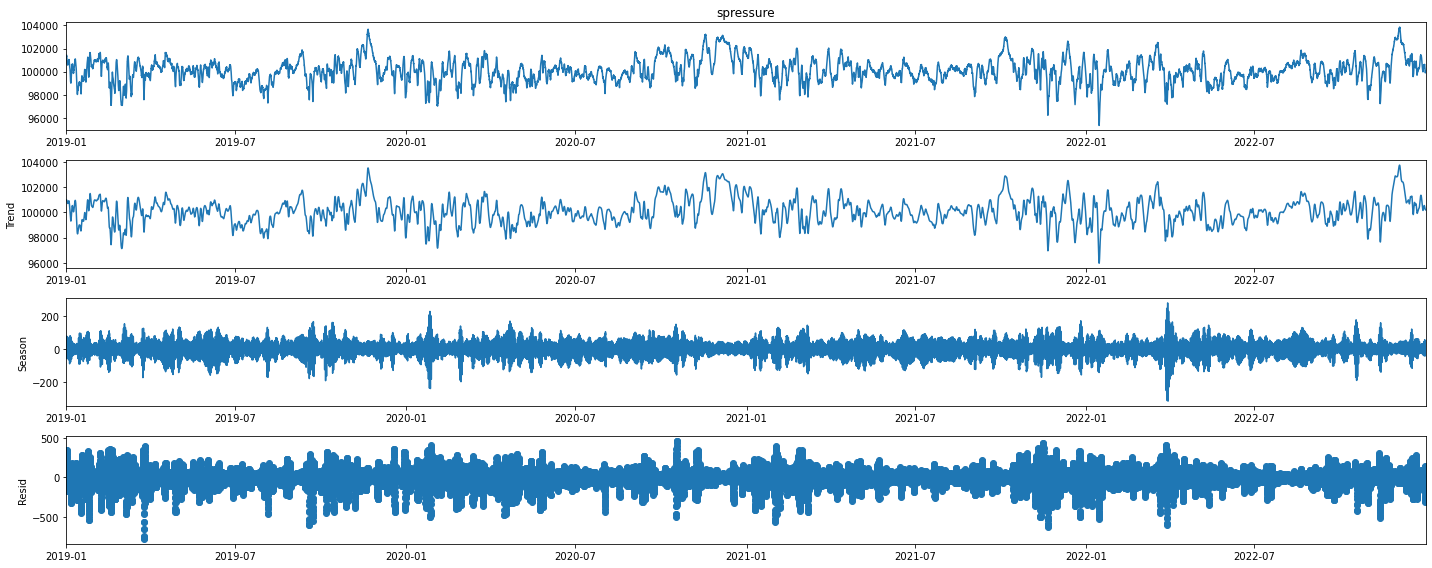

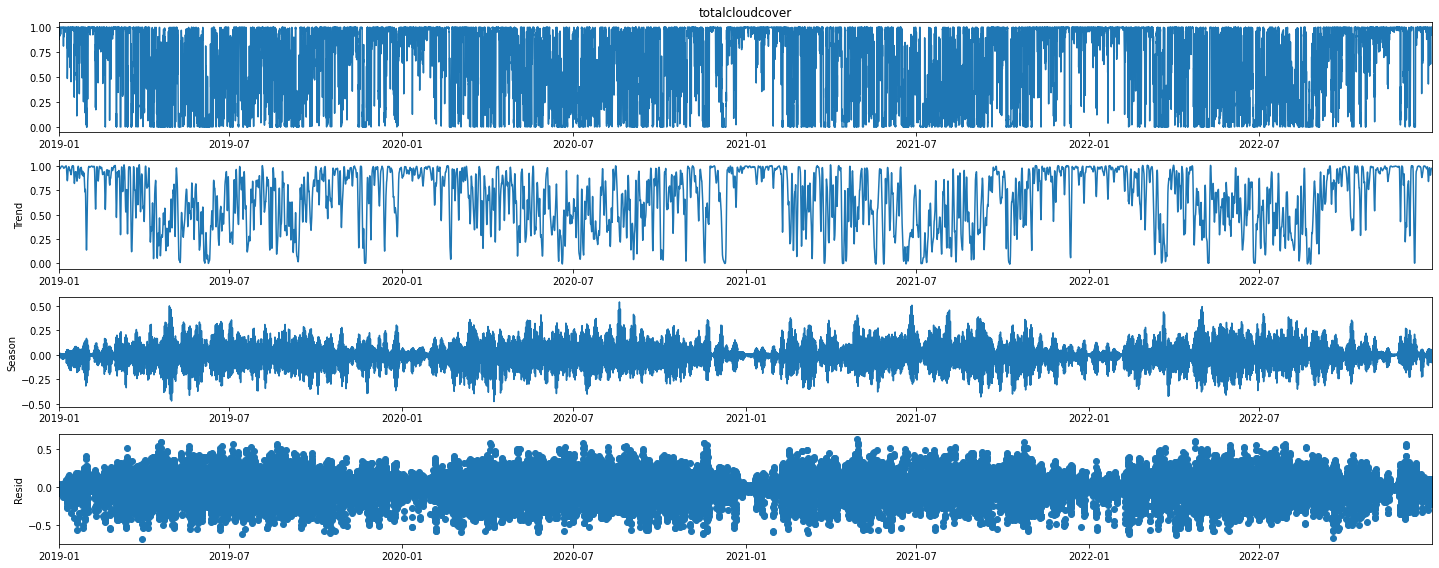

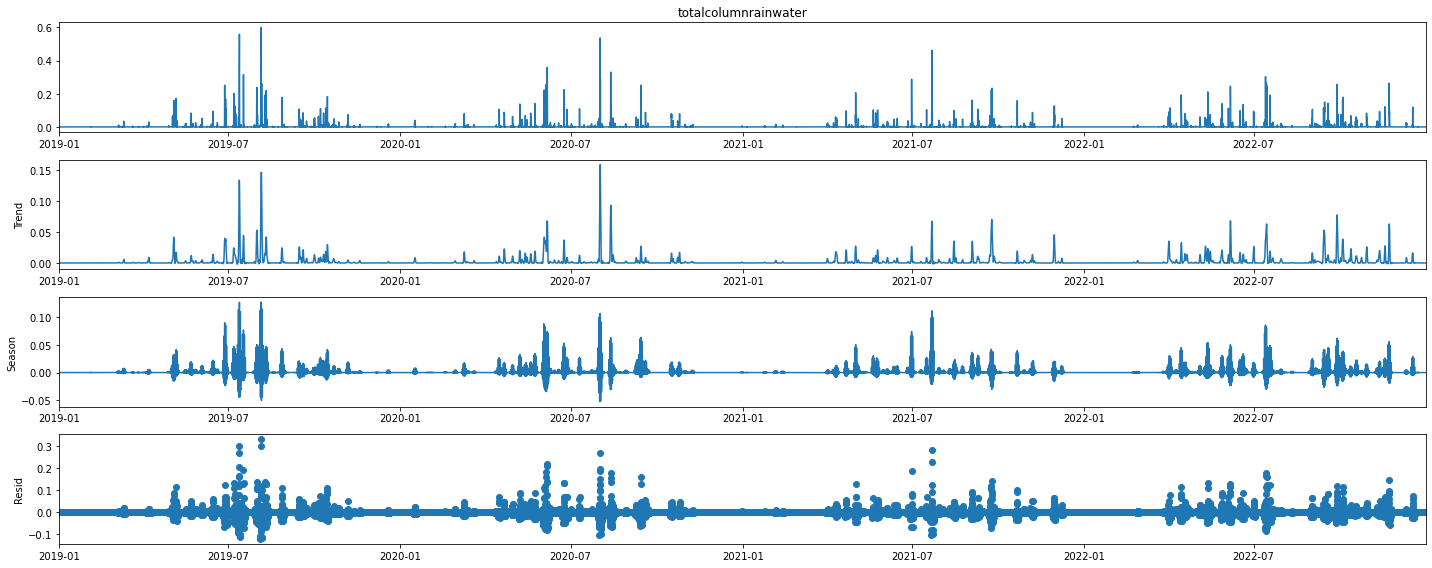

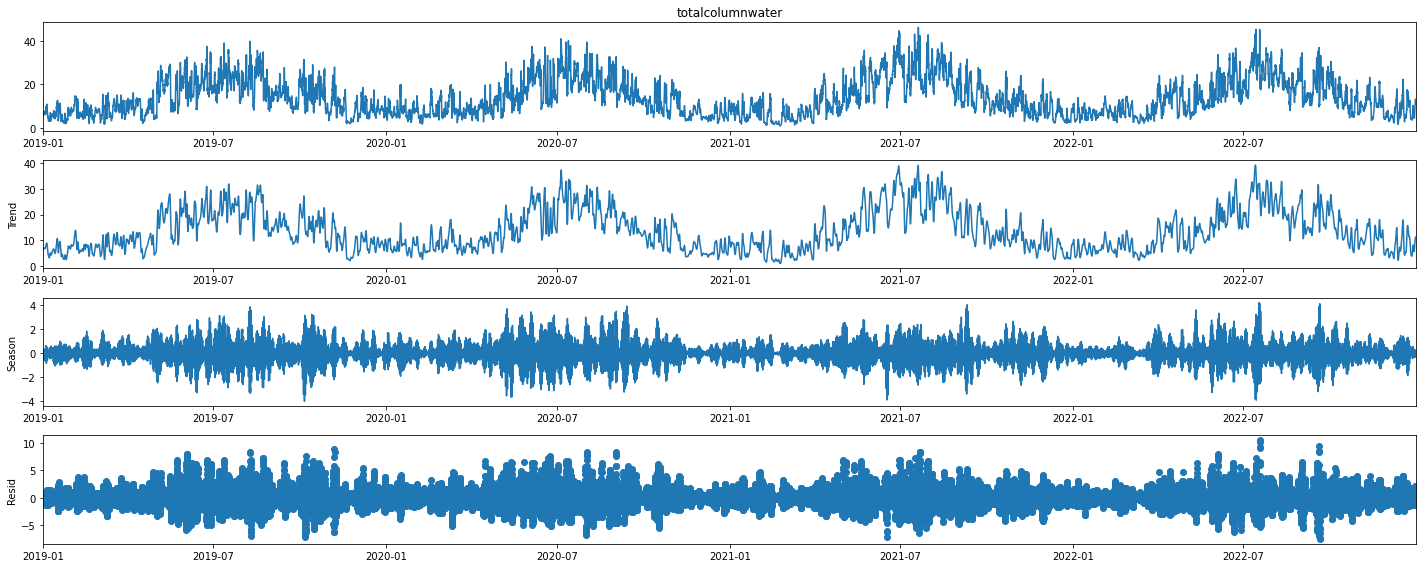

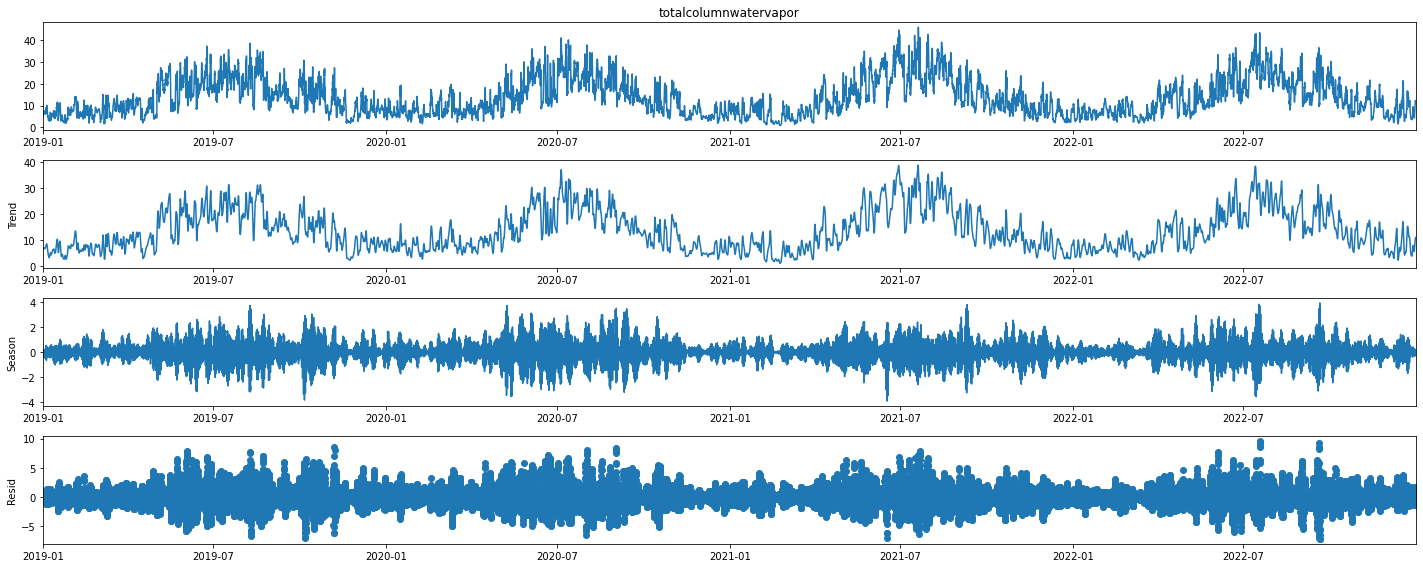

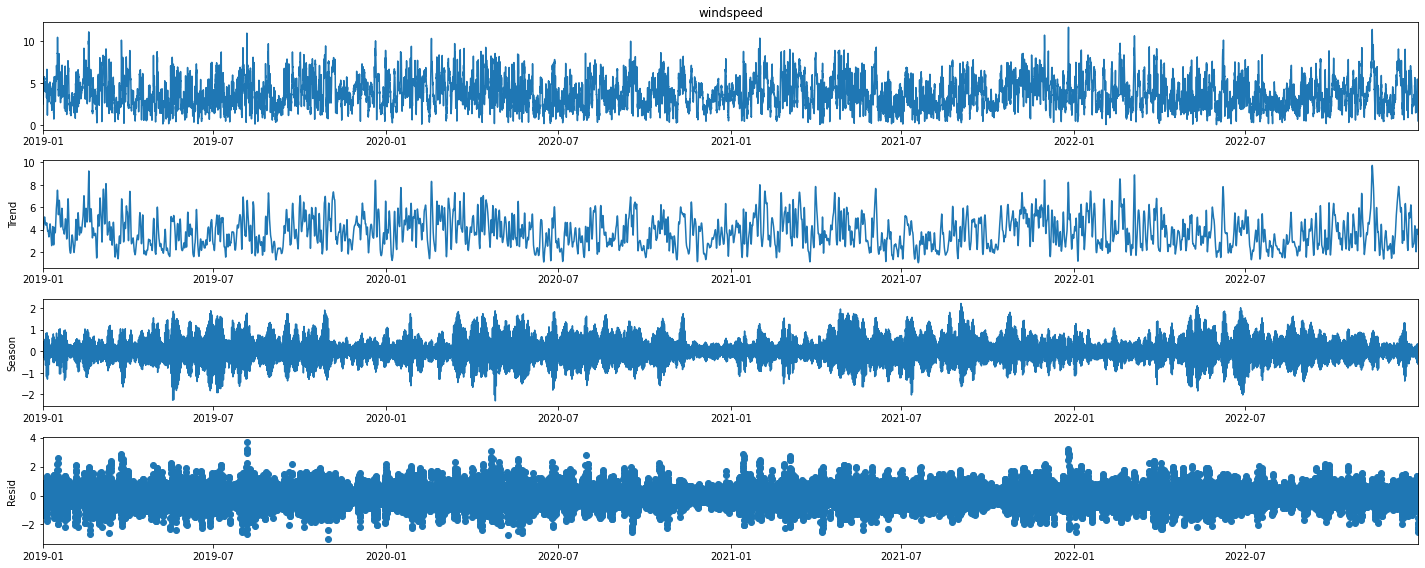

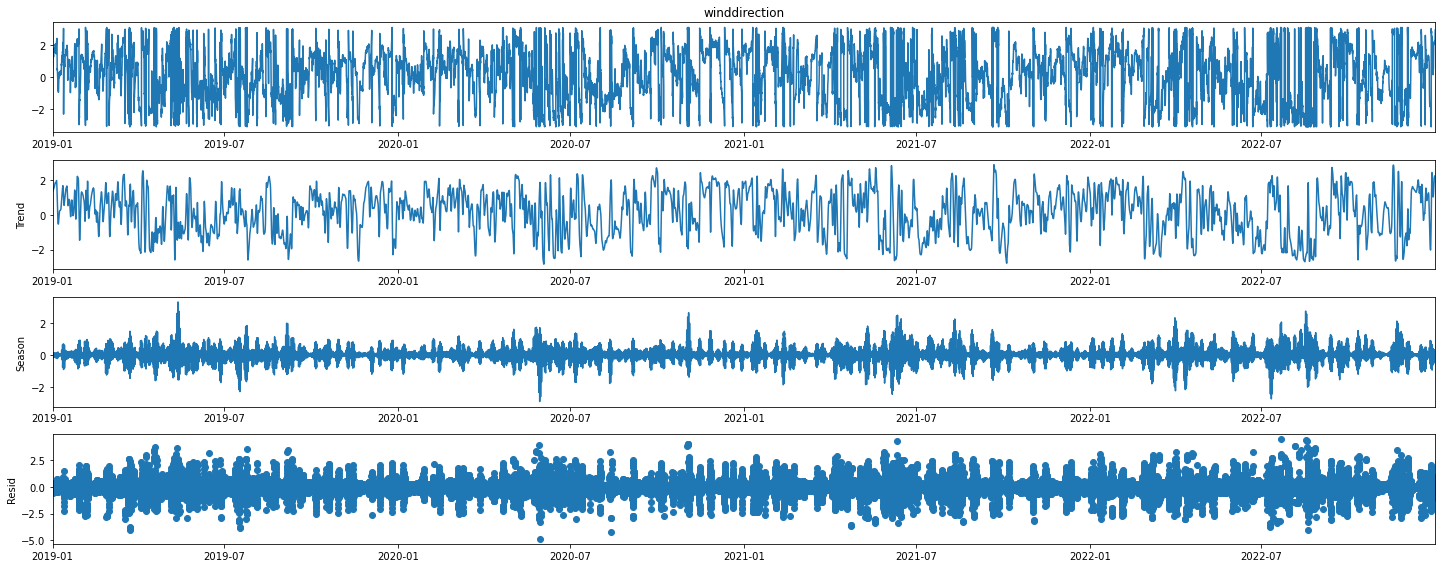

In [42]:
for i in years_data.columns:
    stl = STL(years_data[i])
    res = stl.fit()
    res.plot()
    plt.savefig(f'fig/STL/{i}.png')

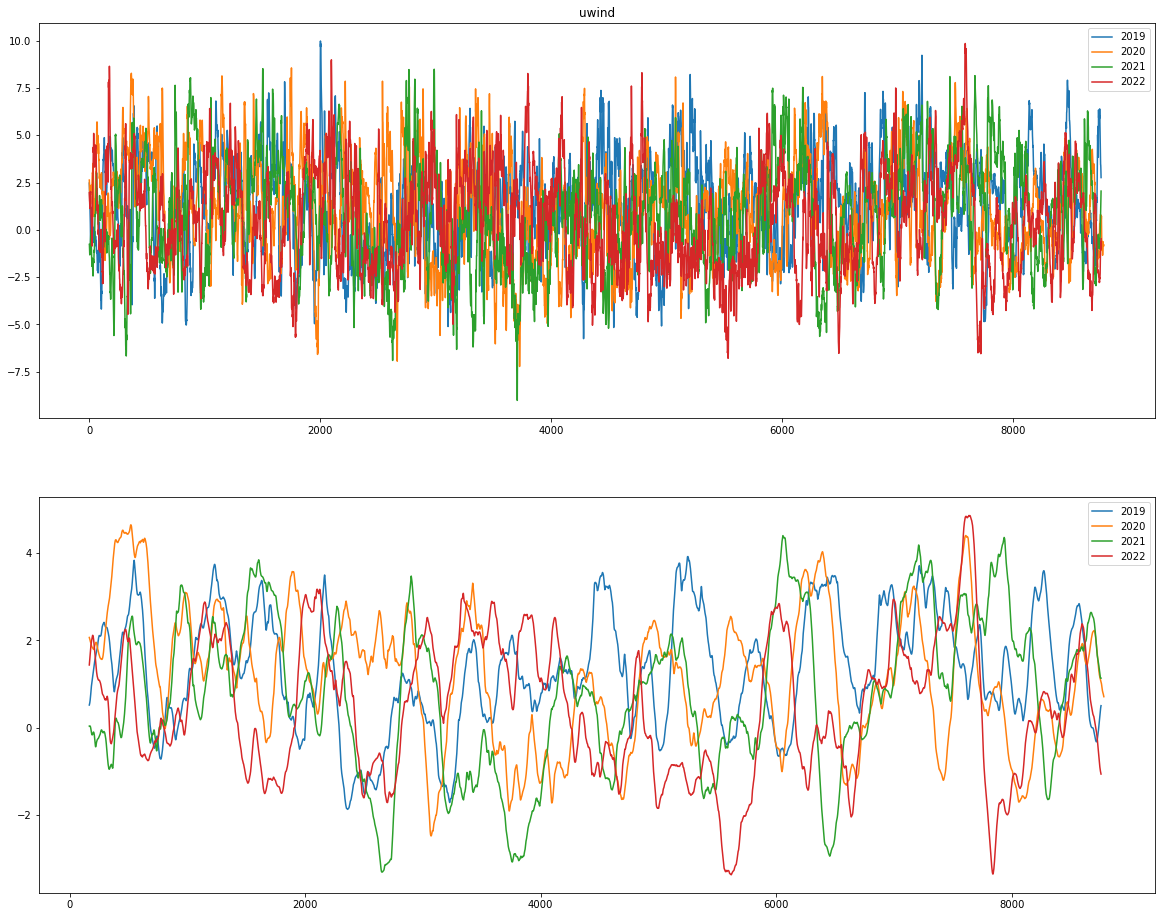

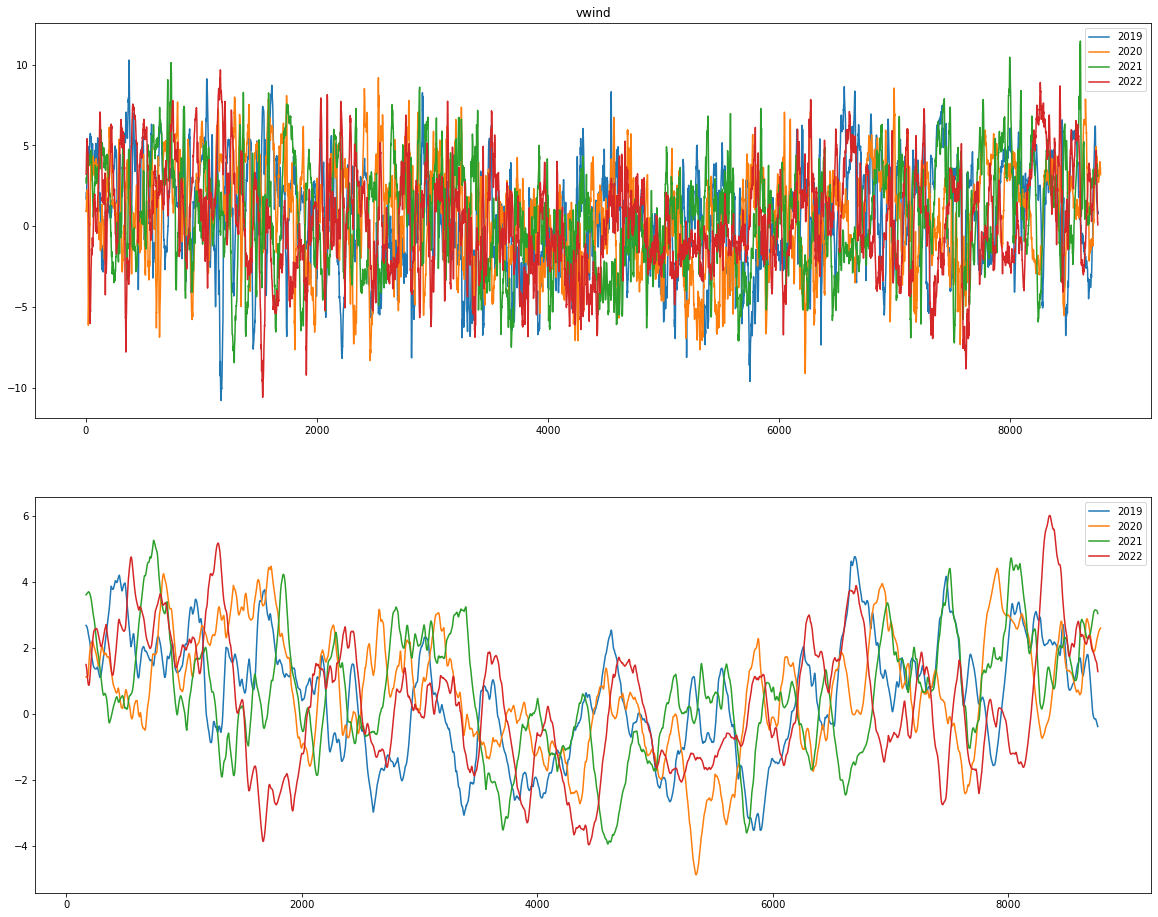

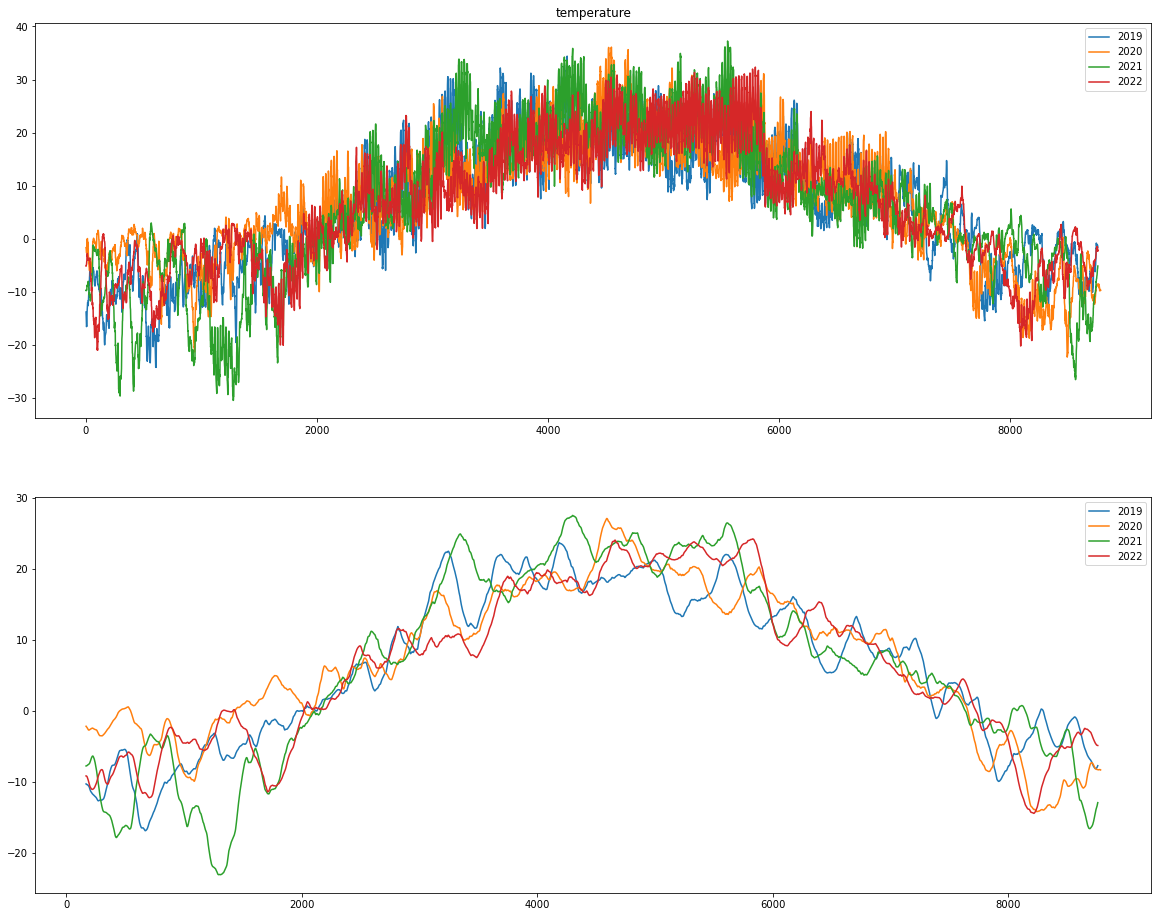

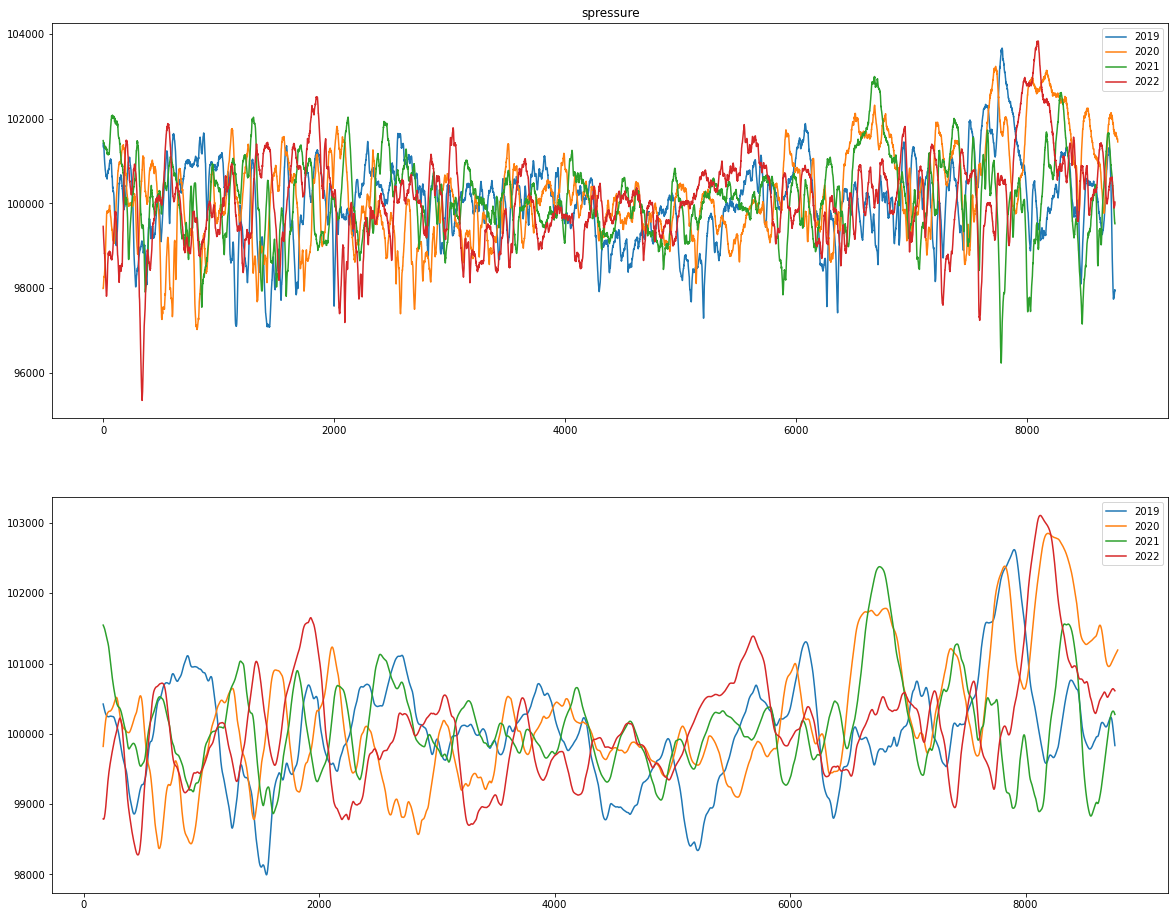

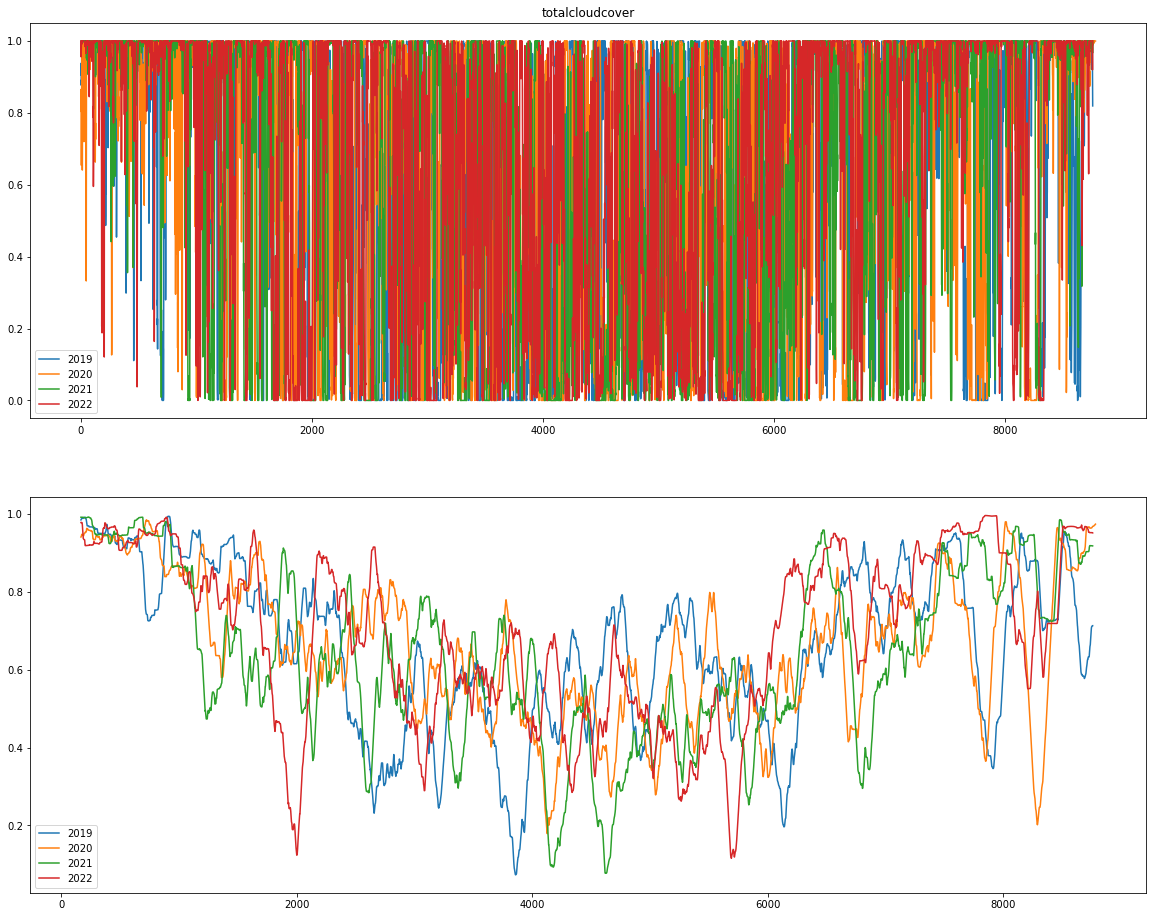

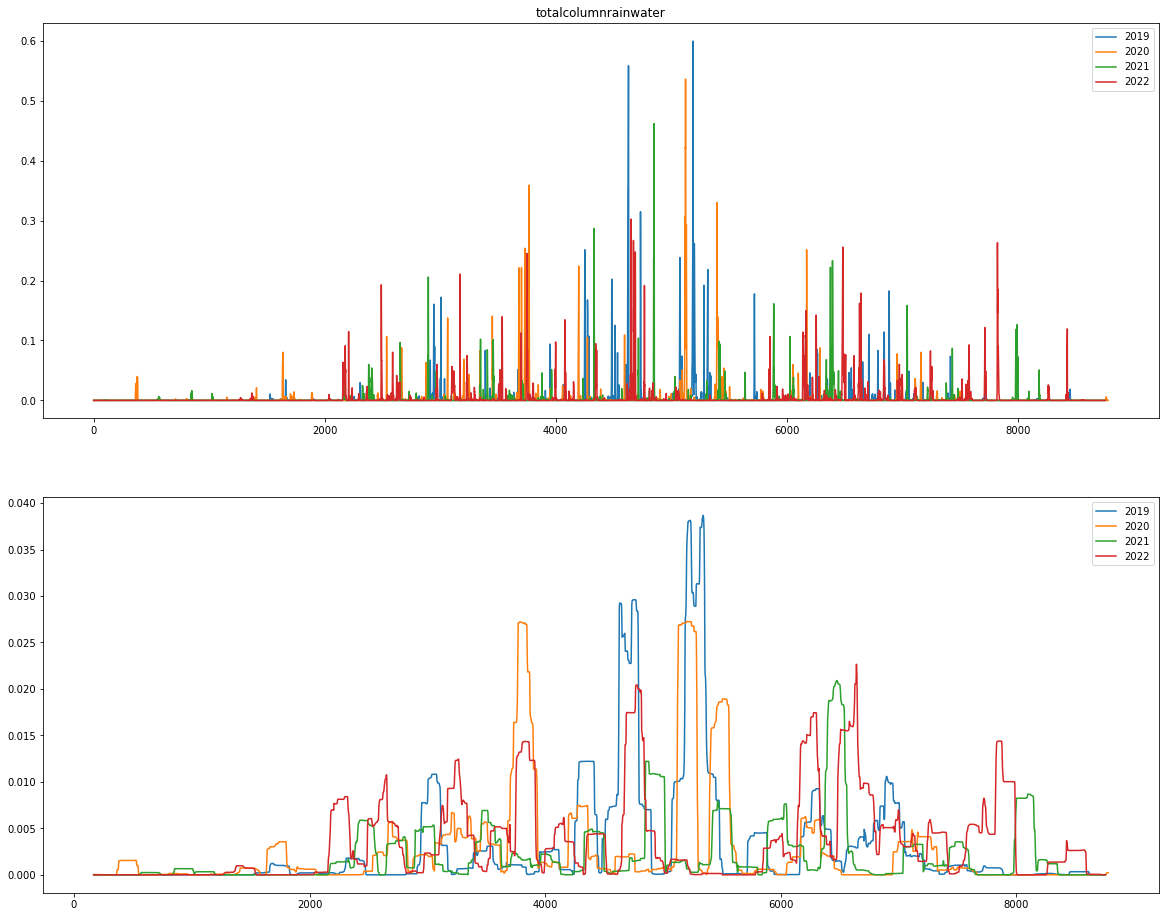

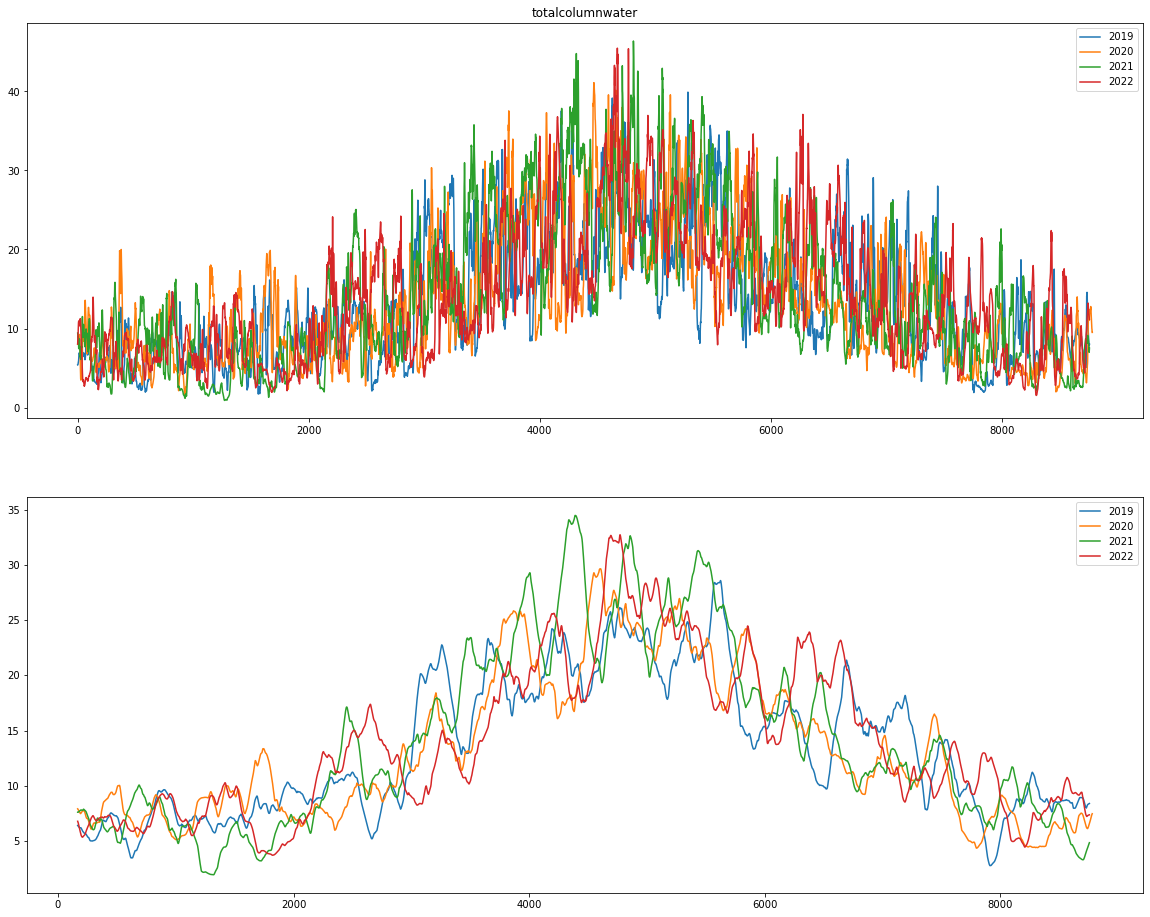

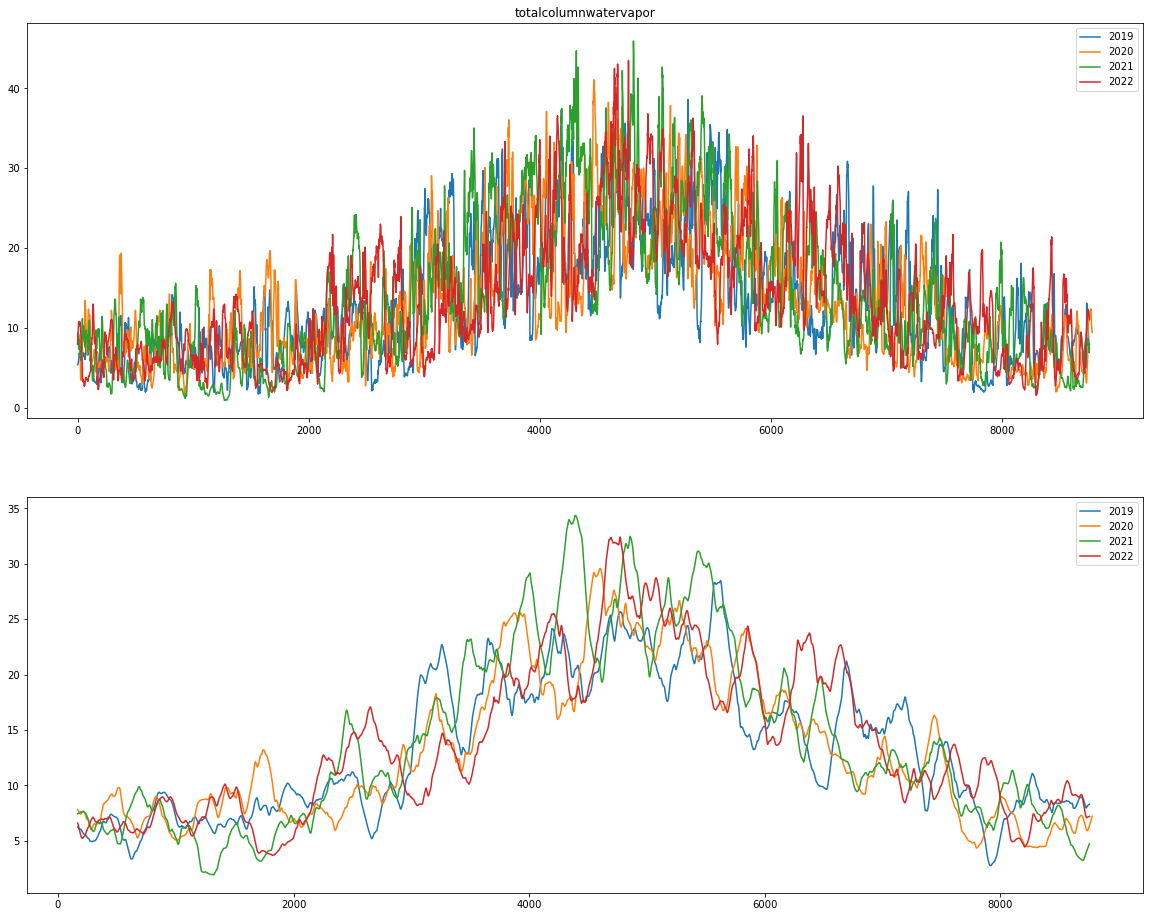

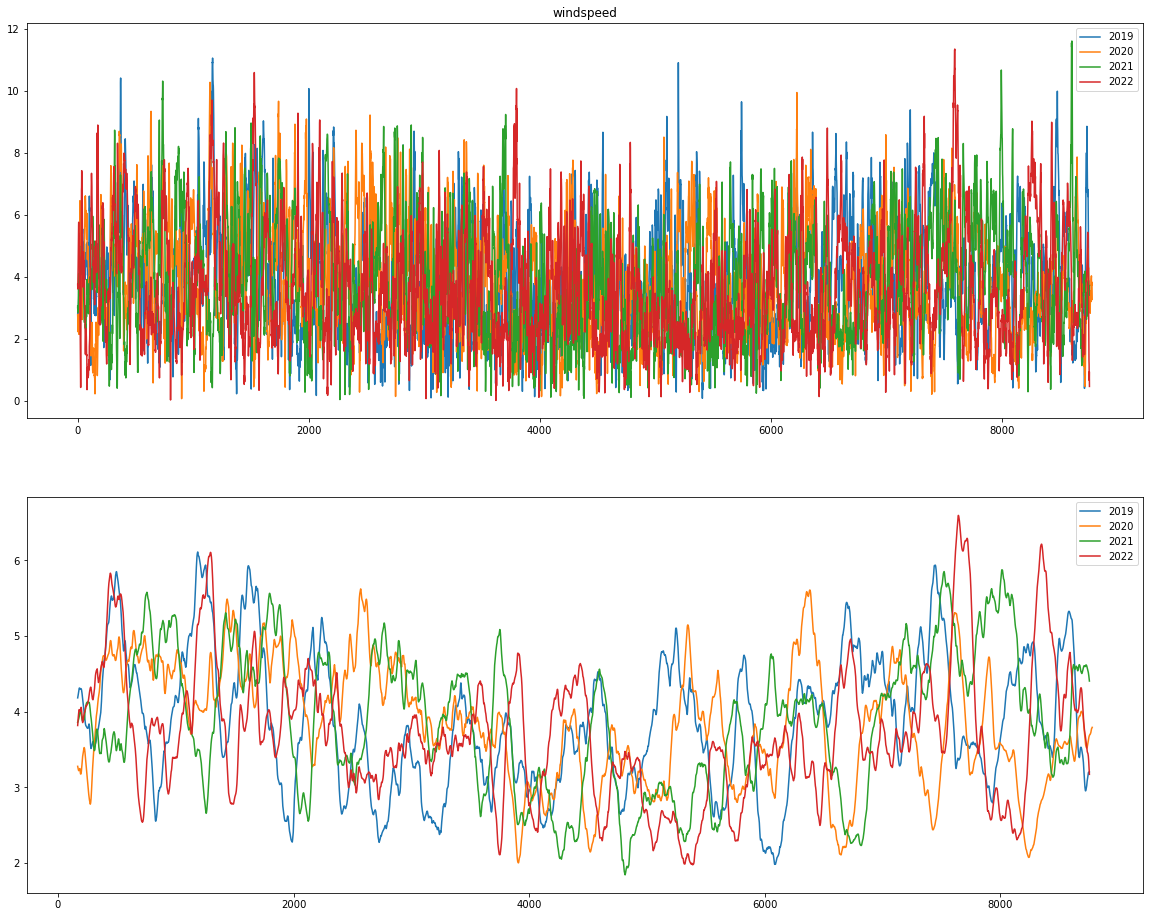

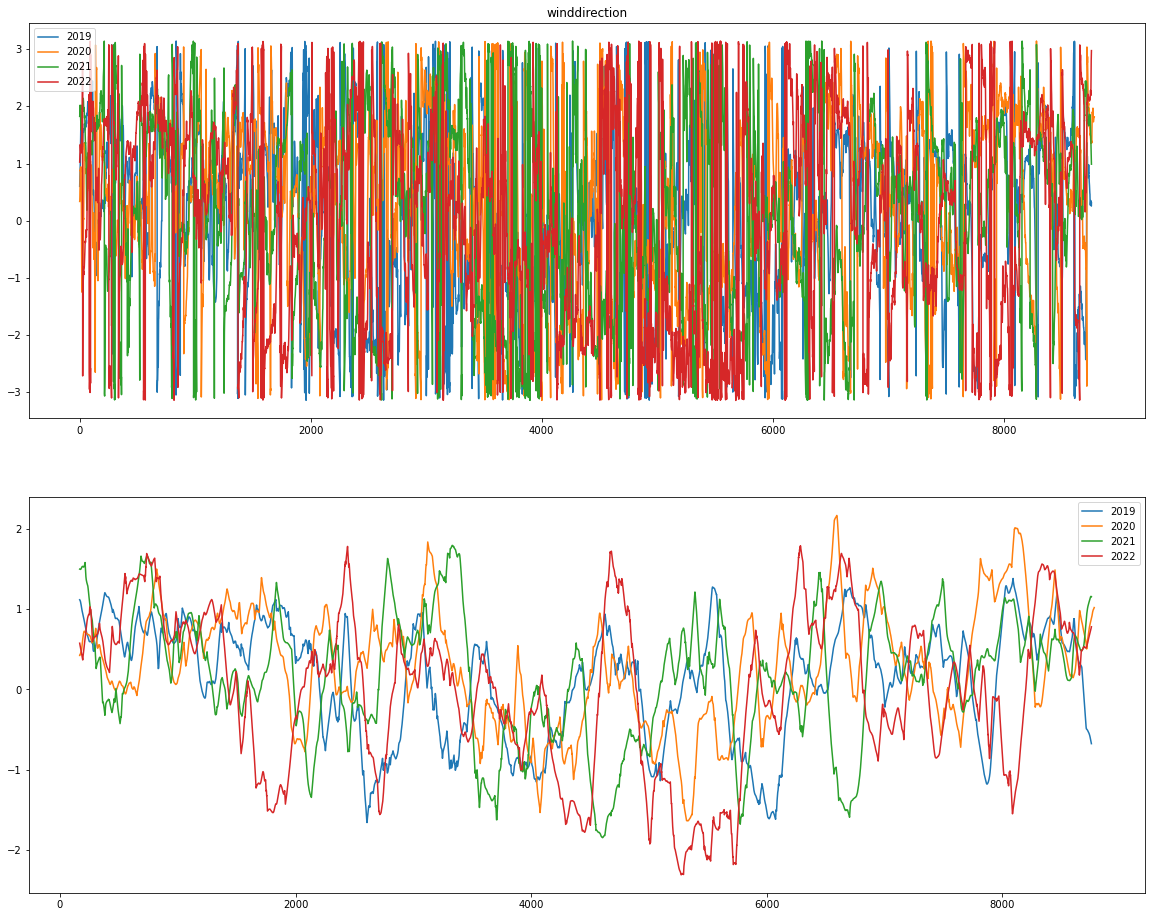

In [51]:
plt.rcParams['figure.figsize'] = [20, 16]
for i in years_data.columns:
    fig, ax = plt.subplots(2)
    for year in years:
        ax[0].plot(range(len(years_data[year][i])), years_data[year][i],label=year)
        ax[1].plot(range(len(years_data[year][i])), years_data[year][i].rolling(window=24*7).mean(),label=year)
    ax[0].set_title(i)
    ax[0].legend()
    ax[1].legend()
    plt.savefig(f'fig/Years/{i}_years.png')
